In [1]:
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
%matplotlib inline
from pmlb import fetch_data
from statistics import mean

In [2]:
from pmlb import fetch_data
import pandas as pd
import numpy as np
adult = fetch_data('adult')
X=adult.drop(columns=[ 'target','fnlwgt','native-country', 'marital-status', 'relationship'])
#y = adult.loc[:, 'target']
y=pd.Series([1 if adult.loc[i,'target']==0 else 0 for i in range(len(X))])
sens_var='sex'
sensitive_value=0
y.value_counts(normalize=True)
good_outcome=1

In [3]:
%run "C:\Users\sgoethals\Documents\Research\Project Oxford\unfairness_fairml\Unfair_ML\functions\clean_functions.py"

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[FairAdapt]'


In [4]:
model='xgb'
test_results, val_results=run_constraints_xgb(X,y, sens_var, sensitive_value)
test_metrics=run_all_results_clean(test_results, val_results, good_outcome)

Run biased model
The AUC of the biased model (validation set) is: 0.9009177107178303
The AUC of the biased model (test set) is: 0.8987744403988762
The AUC of the biased model for the protected group (validation set) is: 0.8786101218933753
The AUC of the biased model for the privileged group (validation set) is: 0.8914980149639162
The AUC of the biased model for the protected group (test set) is: 0.886595493182554
The AUC of the biased model for the privileged group (test set) is: 0.8843522773069654
Calculate demographic parity


100%|██████████| 100/100 [09:41<00:00,  5.82s/it]


Calculate equality of opportunity


 58%|█████▊    | 58/100 [3:27:22<3:46:06, 323.00s/it]

In [10]:
print('Percentage of people in the protected group {}'.format(test_results.protected.mean()))
print('Percentage of people with the target value {}'.format(test_results.target.mean()))
print('The base rate disparity is {}'.format(test_results[test_results.protected==False].target.value_counts(normalize=True)[good_outcome] - test_results[test_results.protected==True].target.value_counts(normalize=True)[good_outcome]))


Percentage of people in the protected group 0.3315043812955532
Percentage of people with the target value 0.23929244124150356
The base rate disparity is 0.1946201505007411


In [5]:
#base rate disparity
print('The average cost of fairness (DP) is {}'.format(mean([a - b for a, b in zip(test_metrics['prec_unfair'], test_metrics['prec_dp'])])))
print('The average cost of fairness (EO) is {}'.format(mean([a - b for a, b in zip(test_metrics['prec_unfair'], test_metrics['prec_eo'])])))

The base rate disparity is 0.1946201505007411
The average cost of fairness (DP) is 0.024038531363961342
The average cost of fairness (EO) is 0.009743548094472382


In [6]:
# save results
import pickle

with open(f'Results/Adult_test_results.pkl', 'wb') as f:
    pickle.dump(test_results, f)
with open(f'Results/Adult_test_metrics.pkl', 'wb') as f:
    pickle.dump(test_metrics, f)

In [7]:
%run "C:\Users\sgoethals\Documents\Research\Project Oxford\unfairness_fairml\Unfair_ML\functions\visualisations.py"

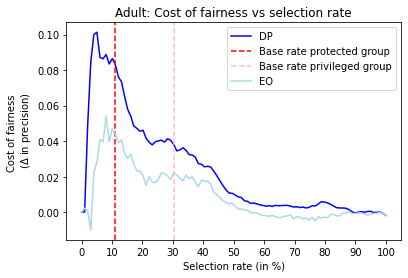

In [8]:
C_list=[i for i in np.linspace(start=1, stop=len(test_results), num=100, dtype=int)]
dataset='Adult'
plot_cost(test_metrics['prec_unfair'],test_metrics['prec_dp'],C_list, test_results, 'precision', 'DP', dataset, test_metrics['prec_eo'], 'EO')   

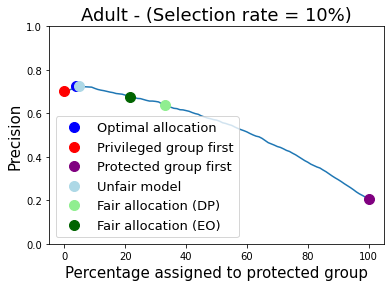

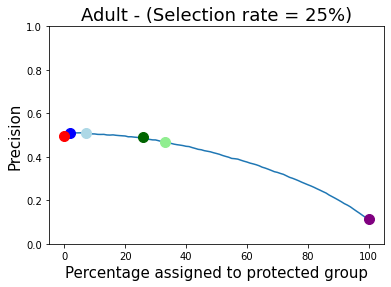

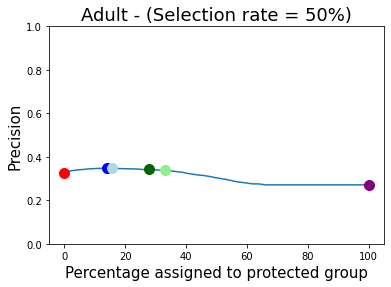

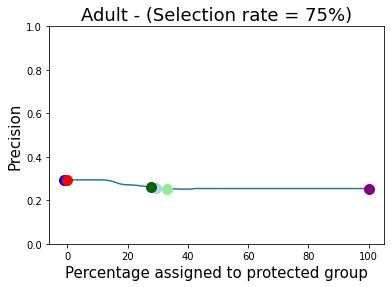

In [11]:
dataset='Adult'
ymin=0
ymax=1
plot_allocation_by_resourcelevel(test_metrics, test_results, C_list,  10,dataset,ymin, ymax, legend=True)
plot_allocation_by_resourcelevel(test_metrics, test_results, C_list,  25,dataset, ymin, ymax)
plot_allocation_by_resourcelevel(test_metrics, test_results, C_list,  50,dataset,ymin, ymax)
plot_allocation_by_resourcelevel(test_metrics, test_results, C_list,  75,dataset, ymin, ymax)